# ------------------------------------ Linear Regression -------------------------------------------------------

Connecting with Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML Project/Bengaluru_House_Data.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Cleaning

In [4]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(subset=['total_sqft', 'size', 'price'], inplace=True)

In [5]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Convert 'size' to number of bedrooms

In [6]:
dataset['size'] = dataset['size'].apply(lambda x: int(str(x).split(' ')[0]) if isinstance(x, str) else x)

# Convert 'total_sqft' to a numeric value

In [7]:
def convert_sqft_to_num(x):
    if '-' in str(x):
        tokens = x.split('-')
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)
dataset.dropna(inplace=True)

# Log-transform the 'price' column to reduce range

In [8]:
dataset['price'] = np.log1p(dataset['price'])
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3.690628
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,4.795791
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,4.564348
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,3.663562
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,5.690359


# Handle categorical variable 'location'

In [9]:

location_counts = dataset['location'].value_counts()
dataset['location'] = dataset['location'].apply(lambda x: x if location_counts[x] > 10 else 'Other')


# Check if 'location' exists, then encode it

In [10]:

label_encoder = LabelEncoder()
if 'location' in dataset.columns:
    dataset['location_encoded'] = label_encoder.fit_transform(dataset['location'])


In [11]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,location_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3.690628,44
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,4.795791,34
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,4.564348,99
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,3.663562,136
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,5.690359,136


# Ensure only numeric columns are included for the correlation matrix

In [12]:
numeric_data = dataset.select_dtypes(include=[np.number])

# Correlation Matrix for Numerical Features

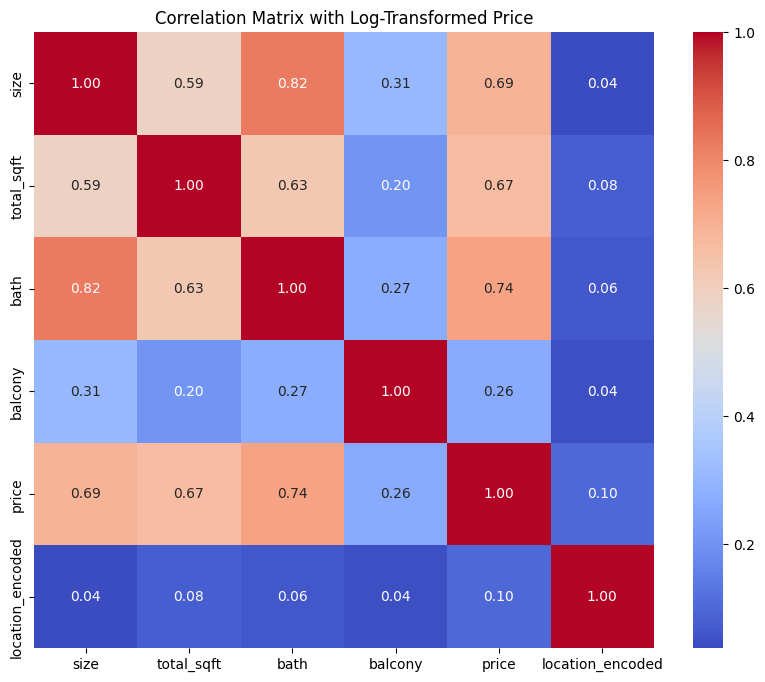

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Log-Transformed Price")
plt.show()


# Drop columns with low correlation to 'price' in the main dataset

In [14]:
correlation_matrix = numeric_data.corr()
low_correlation_features = correlation_matrix.index[abs(correlation_matrix['price']) < 0.1]
dataset = dataset.drop(columns=low_correlation_features)

In [15]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3.690628
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,4.795791
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,4.564348
5,Super built-up Area,Ready To Move,Whitefield,2,DuenaTa,1170.0,2.0,1.0,3.663562
11,Plot Area,Ready To Move,Whitefield,4,Prrry M,2785.0,5.0,3.0,5.690359


# One-hot encode remaining categorical variables

In [16]:

dataset = pd.get_dummies(dataset, columns=['location', 'area_type', 'availability', 'society'], drop_first=True)


# Define features and target variable

In [17]:

X = dataset.drop(['price'], axis=1)
y = dataset['price']


# Standardize features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Linear Regression

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict on test set and convert predictions back to original scale

In [21]:
y_pred = model.predict(X_test)
y_test_exp = np.expm1(y_test)  # Convert log-transformed prices back to original scale
y_pred_exp = np.exp(y_pred)

# Evaluate the model on the original scale

In [22]:
mae = mean_absolute_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 18.2681967684906
Root Mean Squared Error (RMSE): 55.51325389232715


# Plot Actual vs Predicted values on original scale

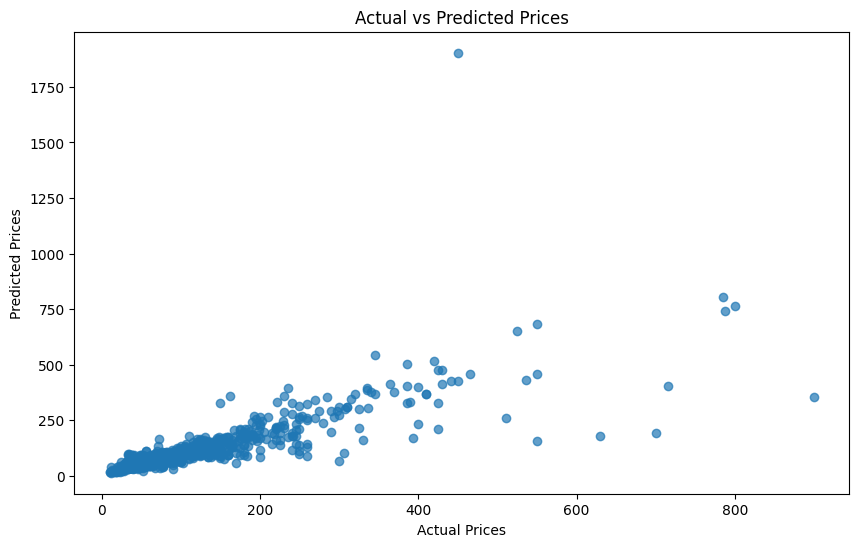

In [23]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()